In [2]:
# imports
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datapath = os.path.join('Datasets', 'co_feats20.pkl') # run this line if in jupyter/cloned repo
# datapath = os.path.join(os.getcwd(),'Monkey_Datasets', 'co_feats32.pkl') # run this line if colab
with open(datapath, 'rb') as f:
    data = pickle.load(f)

In [4]:
reachpositions = np.unique(data['targetPosition'], axis=0)

valid_positions = []
valid_positions.append(reachpositions[2])
valid_positions.append(reachpositions[6])
valid_positions

[array([0.2, 0.8], dtype=float32), array([0.8, 0.2], dtype=float32)]

In [5]:
data_array = []

for pos in valid_positions:
    trials = np.unique(data['trialNumber'][np.where((data['targetPosition'] == pos).all(axis=1))])
    
    for trial in trials:
        behavior_indices = np.where(data['trialNumber'] == trial)[0] 
        behavior_data = data["behavior"][behavior_indices]
        neural_data = data["neural"][behavior_indices]
        
        data_array.append({
            "behavior": behavior_data,
            "neural": neural_data,
            "targetPosition": pos,
            "trialNumber": trial
        })
        
        
output_df = pd.DataFrame(data_array)

In [6]:
output_df

,behavior,neural,targetPosition,trialNumber
0,"[[0.5153846, 0.4724014, 0.0, -0.0011111498, 0....","[[9.75, 23.75, 14.333333333333334, 11.44444444...","[0.2, 0.8]",3
1,"[[0.50747865, 0.49677426, 0.00021368265, 2.980...","[[12.083333333333334, 22.77777777777778, 11.19...","[0.2, 0.8]",13
2,"[[0.5442308, 0.4548387, -0.00057691336, 0.0, 0...","[[11.775, 29.125, 17.15, 13.725, 6.75, 7.675, ...","[0.2, 0.8]",45
3,"[[0.47653842, 0.5017742, 0.00038462877, -0.000...","[[11.15, 25.65, 15.2, 14.675, 7.6, 5.375, 14.5...","[0.2, 0.8]",55
4,"[[0.46132475, 0.48028672, -0.00017094612, -0.0...","[[9.194444444444445, 24.47222222222222, 14.166...","[0.2, 0.8]",57
...,...,...,...,...
188,"[[0.48076922, 0.4937097, 0.0, -0.00016131997, ...","[[10.025, 24.95, 10.05, 11.875, 6.675, 8.55, 1...","[0.8, 0.2]",1456
189,"[[0.46111107, 0.503405, 0.0004273355, -0.00017...","[[10.36111111111111, 20.166666666666668, 9.0, ...","[0.8, 0.2]",1464
190,"[[0.5307693, 0.5196774, -0.00096154213, -0.000...","[[8.975, 18.375, 11.8, 9.7, 5.225, 6.575, 11.9...","[0.8, 0.2]",1492
191,"[[0.540171, 0.5410395, 0.000790596, -0.0008780...","[[8.972222222222221, 22.77777777777778, 12.138...","[0.8, 0.2]",1504


In [7]:
output_df.to_csv('output_df.csv', index=False)
output_df.to_pickle('output_df.pkl')

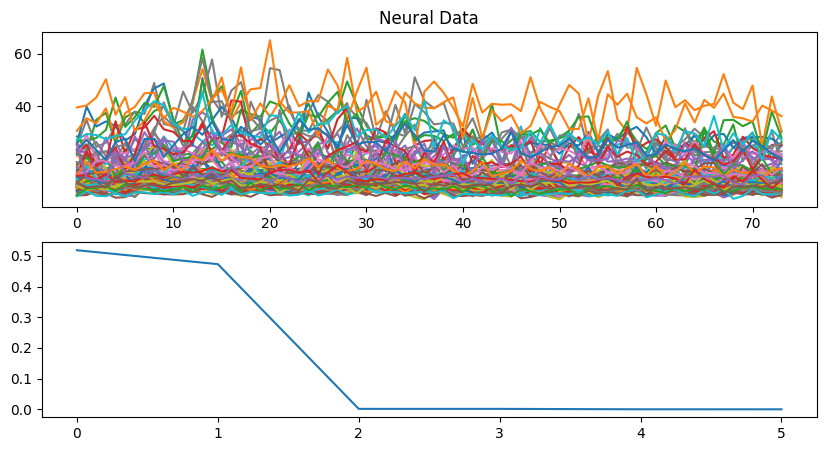

In [126]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(output_df.head(1).neural[0])
plt.title('Neural Data')
plt.subplot(2,1,2)
plt.plot(output_df.head(1).behavior[0][5])